In [1]:
import numpy as np
import torch
import kernel_flow

def Henon(T, dt, N_sims,a,b):
    N_t  = int(T//dt)
    sims = np.zeros((N_sims, N_t, 2))
    for i in range(1,N_t):
        sims[:, i] = np.array([1-a*sims[:,i-1,0]**2+sims[:,i-1,1],b*sims[:,i-1,0]]).T
    return sims.astype(np.float32)

def prepare_data(data_x,delay, normalize):
    lenX=data_x.shape[1]
    num_modes = data_x.shape[0]
    
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
            X[i,(mode*delay):(mode*delay+delay)]=data_x[mode,i:(i+delay)]
            Y[i,(mode*delay):(mode*delay+delay)]=data_x[mode,(i+delay):(i+2*delay)]
    
            
    # Normalize
    X=X/normalize
    Y=Y/normalize
    return X, Y

# generate dataset
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
observed_data= Data[0::2]
train_data = Data[:600,:].T
test_data = Data[600:,:].T
#times
Times = np.linspace(1,2000-1,2000-1)

# Some constants
nparameters=24
delay = 1
regu_lambda = 0.00001

# Get scaling factor
normalize=np.amax(train_data[:,:])

X_train, Y_train = prepare_data(train_data,delay,normalize)
X_test, Y_test = prepare_data(test_data,delay,normalize)


model = kernel_flow.KernelFlows("anl3",nparameters= 24, regu_lambda=regu_lambda)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

model.set_training_data(torch.Tensor(X_train).double(),torch.Tensor(Y_train).double())

for i in range(1000):
    optimizer.zero_grad()
    rho = model.forward()
    if rho>=0 and rho<=1:
        rho.backward()
        optimizer.step()
        print(rho)

print(model.kernel_params)

tensor(0.9839, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.1034, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.5952, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.1741, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0727, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0360, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.1260, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0275, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0206, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0258, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0524, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0301, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0951, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0873, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0647, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0151, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0264, dtype=tor

tensor(0.0192, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0188, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0453, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0117, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0168, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0118, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0305, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0394, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0261, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0293, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0444, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0082, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0440, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0177, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0416, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0204, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0185, dtype=tor

tensor(0.0084, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0084, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0374, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0085, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0196, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0197, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0448, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0057, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0231, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0198, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0211, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0145, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0228, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0127, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0202, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0240, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0263, dtype=tor

tensor(0.0132, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0057, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0051, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0060, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0027, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0052, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0040, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0046, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0091, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0095, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0069, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0187, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0180, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0297, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0114, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0125, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0173, dtype=tor

tensor(0.0044, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0060, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0051, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0240, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0035, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0108, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0031, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0130, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0065, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0032, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0043, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0046, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0039, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0037, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0035, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=tor

tensor(0.0055, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0038, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0032, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0099, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0059, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0143, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0090, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0069, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0100, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0103, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0057, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0027, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0043, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0025, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0027, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0037, dtype=tor

tensor(0.0049, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0067, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0021, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0019, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0039, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0031, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0041, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0043, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0026, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0035, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0033, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0044, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0054, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0064, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0038, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0030, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0026, dtype=tor

In [2]:
model.compute_kernel_and_inverse(regu_lambda = regu_lambda)
Y_pred = model.predict(torch.Tensor(X_test).double())

In [3]:
Y_pred

tensor([[ 0.3845, -0.1843],
        [ 0.3388,  0.1153],
        [ 0.6973,  0.1017],
        ...,
        [ 0.9685, -0.0066],
        [-0.8903,  0.2906],
        [-0.3344, -0.2671]], dtype=torch.float64, grad_fn=<MmBackward>)

In [4]:
(Y_pred.detach()-Y_test).pow(2).mean()

tensor(7.6549e-11, dtype=torch.float64)

Text(0, 0.5, 'y')

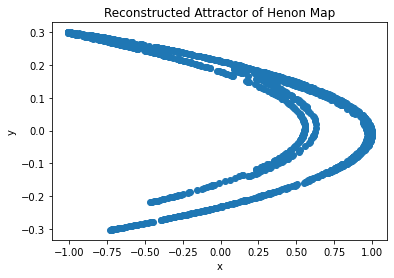

In [8]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred[:,0].detach(),Y_pred[:,1].detach())
plt.title("Reconstructed Attractor of Henon Map")
plt.xlabel("x")
plt.ylabel("y")